In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, train_test_split

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

For comparing across ML models (i.e. RF, GB, LR), sample 20% and do 10-fold CV.
Use default parameters for this.

For the top 2 models, use 60% of data to perform hyperparameter search.

For each model, we want the best set of parameters. 

Output: Optimal parameters, as well as loss for each combination of parameters. Output: 10 different loss values/RMSE per model (boxplot) 

In [2]:
train = pd.read_csv("../data/processed/train.csv")
print(train.shape)
train.head()

(431732, 83)


,Unnamed: 0,floor_area_sqm,resale_price,lease_duration,storey,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved maisonette,...,flat_type_5 room,flat_type_executive,flat_type_multi generation,nbr_ssch_1k,nbr_psch_1k,nbr_mall_1k,nbr_hawker_1k,nbr_comm_1k,nbr_station_1k,avg
0,0,118.0,209700.0,12,2.0,0,0,0,0,0,...,0,0,0,5,6,1,2,1,1,34.742540
1,1,110.0,402300.0,11,11.0,0,0,0,1,0,...,1,0,0,6,8,4,0,0,2,43.015974
2,2,112.0,351000.0,16,2.0,0,0,0,0,0,...,1,0,0,1,2,2,0,0,0,34.900000
3,3,67.0,151200.0,20,8.0,0,0,0,0,0,...,0,0,0,2,2,3,2,0,1,41.729496
4,4,73.0,318600.0,28,8.0,0,0,0,0,0,...,0,0,0,2,2,1,1,0,1,39.884144


In [3]:
train = train.drop(columns=['avg'])
train

,Unnamed: 0,floor_area_sqm,resale_price,lease_duration,storey,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved maisonette,...,flat_type_4 room,flat_type_5 room,flat_type_executive,flat_type_multi generation,nbr_ssch_1k,nbr_psch_1k,nbr_mall_1k,nbr_hawker_1k,nbr_comm_1k,nbr_station_1k
0,0,118.0,209700.0,12,2.0,0,0,0,0,0,...,1,0,0,0,5,6,1,2,1,1
1,1,110.0,402300.0,11,11.0,0,0,0,1,0,...,0,1,0,0,6,8,4,0,0,2
2,2,112.0,351000.0,16,2.0,0,0,0,0,0,...,0,1,0,0,1,2,2,0,0,0
3,3,67.0,151200.0,20,8.0,0,0,0,0,0,...,0,0,0,0,2,2,3,2,0,1
4,4,73.0,318600.0,28,8.0,0,0,0,0,0,...,0,0,0,0,2,2,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,431727,101.0,238500.0,5,2.0,0,0,0,0,0,...,1,0,0,0,3,5,2,0,0,1
431728,431728,95.0,376200.0,4,14.0,0,0,0,0,0,...,1,0,0,0,1,2,3,0,0,0
431729,431729,67.0,255600.0,25,2.0,0,0,0,0,0,...,0,0,0,0,3,4,1,1,0,0
431730,431730,123.0,508500.0,14,17.0,0,0,0,1,0,...,0,1,0,0,4,5,3,0,0,2


In [4]:
test = pd.read_csv("../data/processed/test.csv")
print(test.shape)
test.head()

(107934, 82)


,Unnamed: 0,floor_area_sqm,lease_duration,storey,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved maisonette,flat_model_maisonette,...,flat_type_5 room,flat_type_executive,flat_type_multi generation,nbr_ssch_1k,nbr_psch_1k,nbr_mall_1k,nbr_hawker_1k,nbr_comm_1k,nbr_station_1k,avg
0,0,94.0,15,5.0,0,0,0,0,0,0,...,0,0,0,4,3,2,2,1,102,34.742540
1,1,122.0,4,5.0,0,0,0,1,0,0,...,1,0,0,3,2,0,0,0,117,43.015974
2,2,67.0,20,2.0,0,0,0,0,0,0,...,0,0,0,1,2,4,1,1,116,34.900000
3,3,82.0,34,5.0,0,0,0,0,0,0,...,0,0,0,3,2,3,3,0,72,41.729496
4,4,117.0,26,2.0,0,0,0,0,0,0,...,1,0,0,5,2,3,2,0,101,39.884144


In [5]:
test = test.drop(columns=['avg'])
test

,Unnamed: 0,floor_area_sqm,lease_duration,storey,flat_model_adjoined flat,flat_model_apartment,flat_model_dbss,flat_model_improved,flat_model_improved maisonette,flat_model_maisonette,...,flat_type_4 room,flat_type_5 room,flat_type_executive,flat_type_multi generation,nbr_ssch_1k,nbr_psch_1k,nbr_mall_1k,nbr_hawker_1k,nbr_comm_1k,nbr_station_1k
0,0,94.0,15,5.0,0,0,0,0,0,0,...,1,0,0,0,4,3,2,2,1,102
1,1,122.0,4,5.0,0,0,0,1,0,0,...,0,1,0,0,3,2,0,0,0,117
2,2,67.0,20,2.0,0,0,0,0,0,0,...,0,0,0,0,1,2,4,1,1,116
3,3,82.0,34,5.0,0,0,0,0,0,0,...,0,0,0,0,3,2,3,3,0,72
4,4,117.0,26,2.0,0,0,0,0,0,0,...,0,1,0,0,5,2,3,2,0,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107929,107929,110.0,5,11.0,0,0,0,1,0,0,...,0,1,0,0,2,2,2,1,0,99
107930,107930,102.0,7,14.0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,3,0,101
107931,107931,68.0,21,8.0,0,0,0,1,0,0,...,0,0,0,0,1,0,15,1,2,119
107932,107932,104.0,21,11.0,0,0,0,0,0,0,...,1,0,0,0,1,2,0,0,0,99


In [16]:
y = train.resale_price
X = train.drop(columns=['resale_price'])
predictors = X.columns
print(X.shape)
print(y.shape)

(431732, 81)
(431732,)


In [7]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(345385, 81)
(345385,)
(86347, 81)
(86347,)


In [8]:
seed = 42
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.75, random_state=seed)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(86346, 81)
(86346,)
(86347, 81)
(86347,)


In [9]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
%%time

metrics = ['neg_root_mean_squared_error']
cv_split = 10
models = []
models.append(('RF', RandomForestRegressor(random_state=seed)))
models.append(('GB', GradientBoostingRegressor(random_state=seed)))
models.append(('LR', LinearRegression()))

names = []
rmse_list = []

for name, model in models:
    cv_score = cross_validate(model, X_train, y_train, cv=cv_split, n_jobs=-1, scoring=metrics)
    rmse = cv_score['test_neg_root_mean_squared_error'] * -1
    rmse_list.append(rmse)
    names.append(name)
    msg = f'{name} rmse: {rmse.mean():.3f} (range {rmse.min():.3f}-{rmse.max():.3f})'
    print(msg)

RF rmse: 27224.689 (range 26219.467-27969.615)
GB rmse: 51442.038 (range 50676.237-52496.666)
LR rmse: 40902.258 (range 40031.236-41364.625)
CPU times: user 278 ms, sys: 369 ms, total: 647 ms
Wall time: 15min 59s


In [24]:
rmse_list

[array([27347.45948159, 27111.92084974, 27689.30991387, 27149.24607077,
        27969.61548776, 26219.46733628, 27158.77821938, 27353.11676521,
        27114.54218374, 27133.43293244]),
 array([51170.02688393, 51611.09604722, 51980.69287022, 52496.66640113,
        50730.65979342, 50676.23717159, 51767.94314561, 51457.58012116,
        50970.2049023 , 51559.26995085]),
 array([40646.64103341, 40858.58952769, 41364.62543068, 41215.96216287,
        41282.19974873, 40031.23626699, 40524.18214421, 40951.50243333,
        41017.70772276, 41129.92960301])]

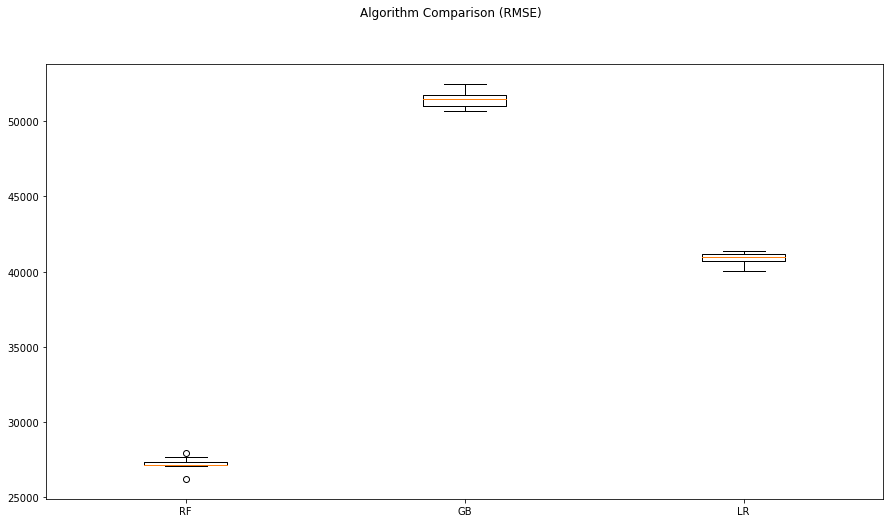

In [13]:
plt.rcParams["figure.figsize"] = (15, 8)
fig = plt.figure()
fig.suptitle('Algorithm Comparison (RMSE)')
ax = fig.add_subplot(111)
plt.boxplot(rmse_list)
ax.set_xticklabels(names)
plt.show()

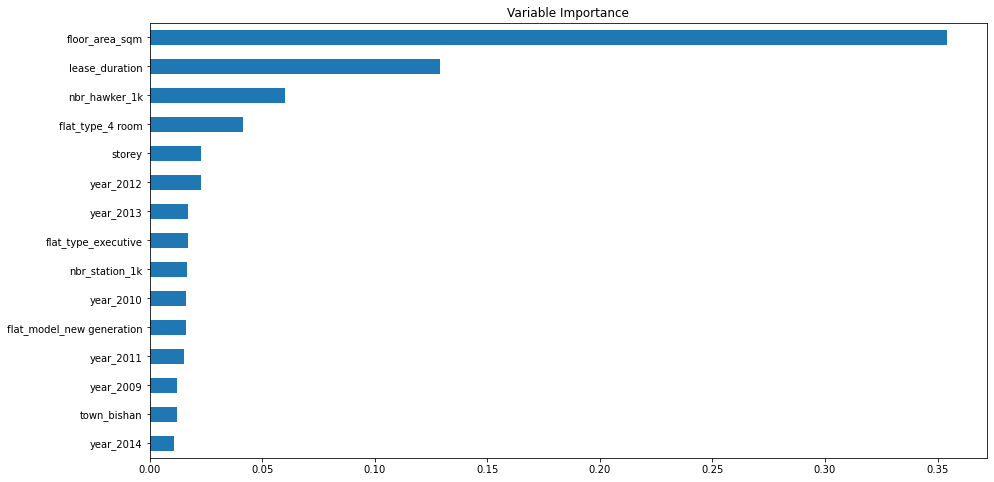

In [19]:
rf = RandomForestRegressor(random_state=seed)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
plt.rcParams["figure.figsize"] = (15, 8)
feat_imp = pd.Series(rf.feature_importances_, predictors).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh')
plt.title('Variable Importance')
plt.show()

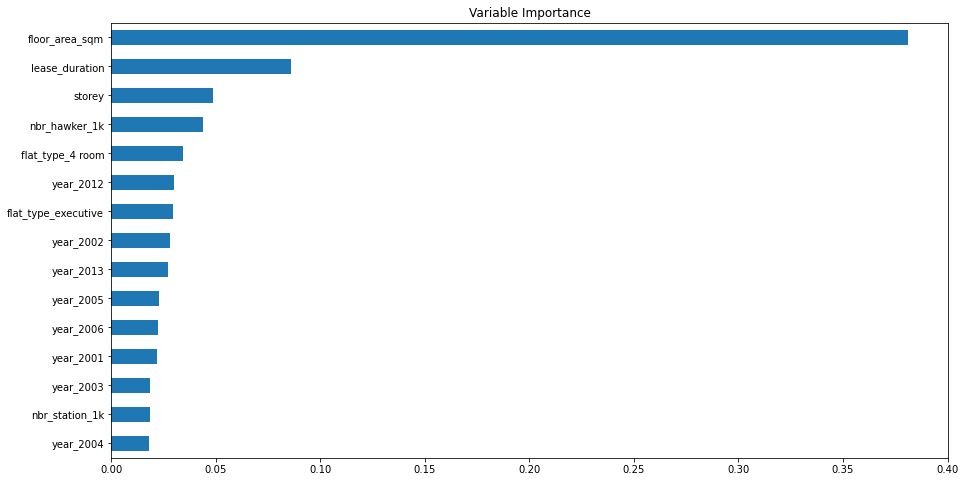

In [20]:
gb = GradientBoostingRegressor(random_state=seed)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
plt.rcParams["figure.figsize"] = (15, 8)
feat_imp = pd.Series(gb.feature_importances_, predictors).sort_values(ascending=True).tail(15)
feat_imp.plot(kind='barh')
plt.title('Variable Importance')
plt.show()